<a href="https://colab.research.google.com/github/hizhnyack/gamblersTeam_TBank/blob/main/segment_portret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

SPRIMARY = "#FFDD2D"
SBASE_01 = "#F5F5F8"
SBASE_02 = "#333333"
SBASE_03 = "#FFFFFF"
SACCENT = "#428BF9"

sns.set_style("whitegrid")
plt.rcParams.update({
    "axes.facecolor": SBASE_03,
    "figure.facecolor": SBASE_03,
    "grid.color": "#E0E0E0",
    "axes.edgecolor": SBASE_02,
    "axes.labelcolor": SBASE_02,
    "xtick.color": SBASE_02,
    "ytick.color": SBASE_02,
    "text.color": SBASE_02,
    "font.family": "sans-serif",

    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "axes.titlecolor": SBASE_02,
    "axes.labelsize": 13,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 11,

    "grid.linewidth": 0.8,
    "grid.alpha": 0.3,
    "axes.linewidth": 1.2,
    "lines.linewidth": 2.5,
})

brand_palette = [SACCENT, SPRIMARY, "#FF8E29", "#2ACA80", "#A56EFF"]
sns.set_palette(brand_palette)

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/full_data_clean_and_preproc.csv')

In [ ]:
df1.set_index('key', inplace=True)

In [ ]:
credit_class = pd.read_csv('/content/drive/MyDrive/credit_class_for_key.csv', index_col=['key'])

In [ ]:
hlop = pd.read_csv('/content/drive/MyDrive/hlop.csv', index_col=['key'])

In [ ]:
for col in df1.columns.to_list():
  if df1[col].dtype == 'float64' or df1[col].dtype == 'int64':
    df1.loc[:, col] = df1.loc[:, col].fillna(0)
  else:
    df1.loc[:, col] = df1[col].fillna('unknown')

In [ ]:
clusters = pd.read_csv('/content/drive/MyDrive/clusters_key.csv', index_col=['key'])
df1 = df1.join(clusters, how='inner').join(credit_class, how='inner')

In [ ]:
df1 = df1.join(hlop, how='inner')

In [ ]:
df = df1.copy()
df.head()

,expiration_minus_1d_dt,id,target,renewal_amt,one_prc_loyalty_accrual_rub_amt,sovokupnyj_balans,sovokupnye_traty,median_monthly_income_amt,monthly_income_amt,avg_integral_cur_rur_balance,avg_out_puc,credit_amt_norm_cls_max,tarif_id,months_cnt,renewal_cnt,target_cashback_amt,target_lifestyle_cashback_amt,target_merch_cashback_amt,target_bnk_cashback_amt,high_category_loyalty_accrual_rub_amt,high_category_loyalty_accrual_bns_amt,first_category,second_category,third_category,sum_second_category,sum_third_category,3+_aktivnyh_produkta,Deneg_bolee_100tys,Deneg_bolee_10tys,Traty_bolee_10tys,Private,IFL,Strahovanie_ipoteki,Oteli,Kasko,Karshering,VZR,Sovmestnyj_schet,Vklad,IIS,Premium,Travel,Oplatil_toplivo_v_Tinkoff_Gorod,Sharing_scheta,Oplatil_shtraf,Avtoplatezh,LifeStyle,Kubyshka,Popolnjal_brokerskij,Dopka_na_3_litso,Biznes_schet,Osago,Poluchaet_ZP,Privel_druga,used_special_offer,ZhKH,Poluchil_mezhbankovskij_perevod,Podpiski_na_servisy,Junior,Est'_mobajl,Investkopilka,Pro,Nakopitel'nyj_schet,Taksi,NS_keptivnaja_strahovka,Popolnil_v_bankomate,Zapravki,Podpiska_na_shtrafy,Brokerskij_schet,Perevod_po_telefonu_karte_so_sbera,Dostavka_edy,Odezhda_elektronika,Oplata_SBP_po_QR,Ecom,Obschestvennyj_transport,Internet,Mobil'naja_svjaz',Kafe_restorany_fastfud,Onlajn_tranzaktsija,Kreditnyj_produkt,Ishodjaschij_SBP_perevod,Supermarket,Poluchil_vhodjaschij_SBP,Est'_DK,party_rk_count,Mobajl_kontaktnyj_nomer,count_top_friends,max_count_of_close_mob,time_since_utilization_brk,time_since_opened_mob,full_time_mob,count_of_utils_mob,count_of_open_brk,count_of_ever_opened_tcn,count_of_ever_opened_ccr,count_of_all_open,age,min_age,use_sum_month_12_cnt,use_union_month_cnt,delay_m4_cnt,accnt_auto_cnt,zkr_open_accnt_cnt,days_cred_use_sum,accnt_rev_cnt,accnt_cnt,max_out_tel_mbk_cnt,max_out_puc_cnt,max_days_from_open_dt_min,out_request_cnt_sum,out_request_cnt_3,out_request_cnt_3_sum,out_request_cnt,median_friend_lifetime,median_count_of_ever_opened_cor,median_turnover,mpl_std_time,education_level_cd,marital_status_cd,risk_level_cd,authorization_type_cd,time_zone_delta_tm,gender_cd,days_from_bki_request_dt_max,days_from_open_dt_max,days_from_open_dt_min,avg_friend_lifetime,avg_count_of_utils_lon,stddev_total_curr_balance,avg_in_c2c_int_amt,avg_in_sbp_cnt,avg_purchase_interchange_fee_amt,avg_total_cur_balance,avg_turnover,avg_out_request_cnt_3,avg_credit_amt_opn_rev_sum,avg_out_request_cnt,avg_delay_m4_cnt,avg_credit_amt_norm_cls_max,avg_hl_delay_log,longitude,avg_education_level,gender_rate,ipl_perc,ratio_outstnd_credit_rev,cur_delqbalance_max,log_p_q_av,zkr_debt_sum,cred_av_log,hl_delay_log,credit_amt_opn_rev_sum,outstnd_amt_opn_nrev_sum,outst_rate,wrst_delqbalance_max,diff_sovkombank_24_max,diff_sovkombank_12_max,diff_sovkombank_6_max,diff_sovkombank_3_max,diff_sber_24_max,diff_sber_12_max,diff_sber_6_max,diff_sber_3_max,diff_sber_2_max,diff_russkiy_standart_24_max,diff_russkiy_standart_12_max,diff_russkiy_standart_6_max,diff_russkiy_standart_3_max,diff_rosselkhoz_24_max,diff_rosselkhoz_12_max,diff_rosselkhoz_6_max,diff_rosselkhoz_3_max,diff_rayffayzen_24_max,diff_rayffayzen_12_max,diff_rayffayzen_6_max,diff_rayffayzen_3_max,diff_promsvyazbank_24_max,diff_promsvyazbank_12_max,diff_promsvyazbank_6_max,diff_promsvyazbank_3_max,diff_psb_24_max,diff_psb_12_max,diff_psb_6_max,diff_psb_3_max,diff_mkb_24_max,diff_mkb_12_max,diff_mkb_6_max,diff_mkb_3_max,diff_mkb_2_max,diff_gazprombank_24_max,diff_gazprombank_12_max,diff_gazprombank_6_max,diff_gazprombank_3_max,diff_vtb_24_max,diff_vtb_12_max,diff_vtb_6_max,diff_vtb_3_max,diff_alfa_bank_24_max,diff_alfa_bank_12_max,diff_alfa_bank_6_max,diff_alfa_bank_3_max,diff_sovkombank_24_mean,diff_sovkombank_12_mean,diff_sovkombank_6_mean,diff_sovkombank_3_mean,diff_sber_24_mean,diff_sber_12_mean,diff_sber_6_mean,diff_sber_3_mean,diff_sber_2_mean,diff_russkiy_standart_24_mean,diff_russkiy_standart_12_mean,diff_russkiy_standart_6_mean,diff_russkiy_standart_3_mean,diff_rosselkhoz_24_mean,diff_rosselkhoz_12_mean,diff_rosselkhoz_6_

In [ ]:
df.dtypes.value_counts()

,count
float64,193
int64,76
object,7


In [ ]:
binary_cols = ['IFL', 'Strahovanie_ipoteki', 'Oteli', 'Kasko', 'Karshering', 'VZR', 'Travel',
              'Oplatil_toplivo_v_Tinkoff_Gorod', 'Oplatil_shtraf', 'Avtoplatezh', 'LifeStyle',
              'Dopka_na_3_litso', 'Osago', 'Privel_druga', 'used_special_offer', 'ZhKH',
              'Poluchil_mezhbankovskij_perevod', 'Podpiski_na_servisy', 'Junior', 'Est_mobajl',
              'Investkopilka', 'Taksi', 'NS_keptivnaja_strahovka', 'Popolnil_v_bankomate',
              'Zapravki', 'Podpiska_na_shtrafy', 'Perevod_po_telefonu_karte_so_sbera',
              'Dostavka_edy', 'Odezhda_elektronika', 'Ecom', 'Obschestvennyj_transport',
              'Mobilnaja_svjaz', 'Kafe_restorany_fastfud', 'Onlajn_tranzaktsija', 'Supermarket',
              'Sovmestnyj_schet', 'IIS', 'Premium', 'Sharing_scheta', 'Kubyshka',
              'Popolnjal_brokerskij', 'Biznes_schet', 'Pro', 'Nakopitelnyj_schet',
              'Brokerskij_schet', 'Kreditnyj_produkt']

numeric_cols = ['avg_hl_delay_log', 'cred_av_log', 'sovokupnye_traty',
               'avg_integral_cur_rur_balance', 'avg_out_puc', 'months_cnt',
               'party_rk_count', 'time_since_utilization_brk', 'time_since_opened_mob',
               'accnt_auto_cnt', 'accnt_cnt', 'max_out_tel_mbk_cnt', 'mpl_std_time',
               'avg_total_cur_balance', 'avg_out_request_cnt', 'ipl_perc', 'log_p_q_av',
               'count_of_open_brk', 'count_of_ever_opened_ccr', 'count_of_all_open',
               'median_count_of_ever_opened_cor', 'avg_count_of_utils_lon']

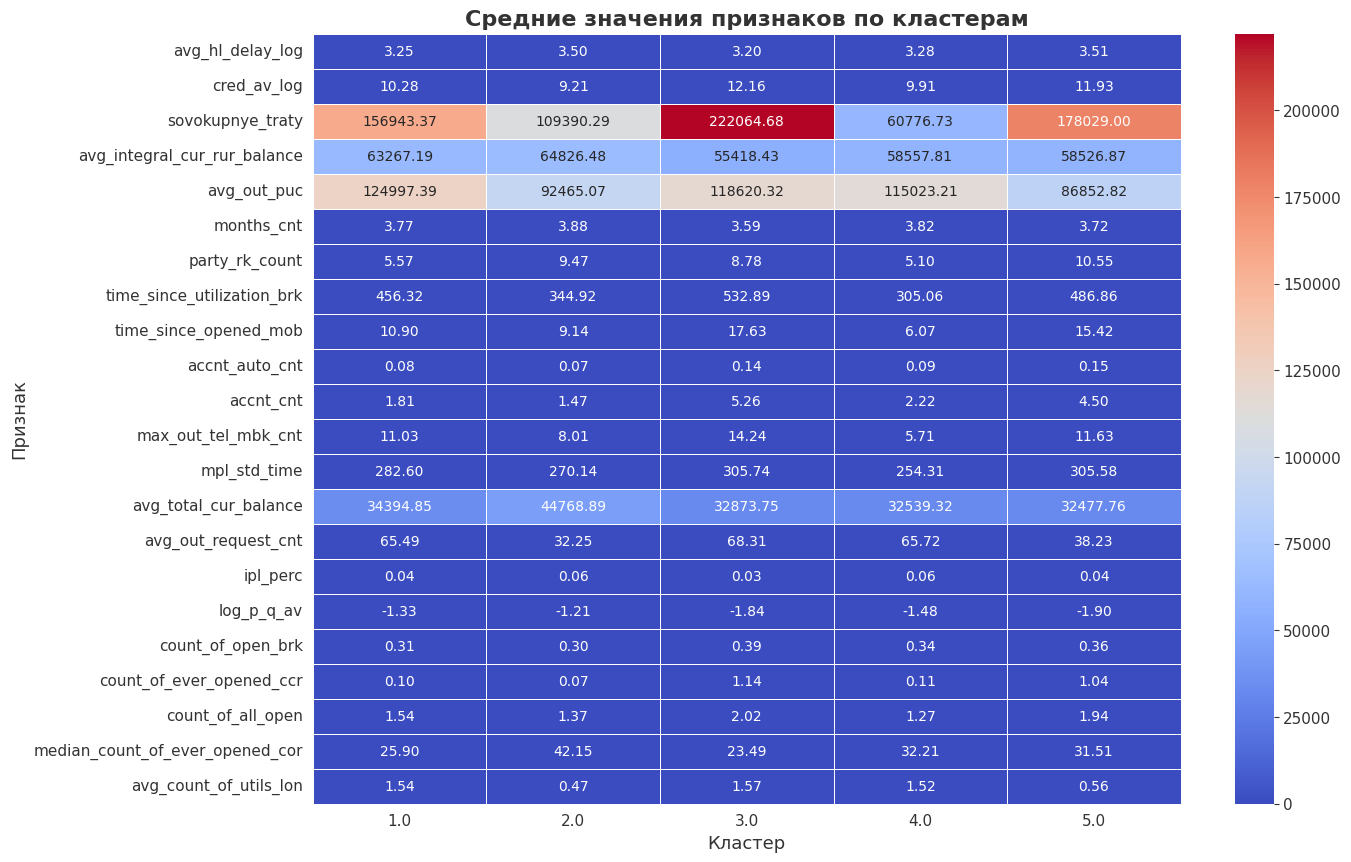

In [ ]:
cluster_analysis = df[numeric_cols + ['cluster']].groupby('cluster').mean().T

plt.figure(figsize=(14, 10))
sns.heatmap(
    cluster_analysis,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=.5
)
plt.title('Средние значения признаков по кластерам')
plt.ylabel('Признак')
plt.xlabel('Кластер')
plt.show()

<ipython-input-118-5b8378898268>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


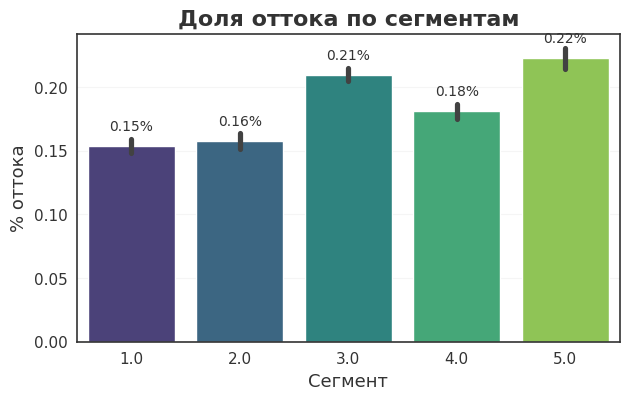

In [ ]:
import numpy as np
plt.figure(figsize=(7, 4))
ax = sns.barplot(
    data=df,
    x='cluster',
    y='target',
    palette='viridis'
)
plt.title('Доля оттока по сегментам')
plt.xlabel('Сегмент')
plt.ylabel('% оттока')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%',
                (p.get_x() + p.get_width()/2., p.get_height() + 0.01),
                ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')
plt.show()

<ipython-input-120-00d7b1d42f32>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='cluster', y=metric, ax=ax[i], palette='Blues')
<ipython-input-120-00d7b1d42f32>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='cluster', y=metric, ax=ax[i], palette='Blues')
<ipython-input-120-00d7b1d42f32>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='cluster', y=metric, ax=ax[i], palette='Blues')


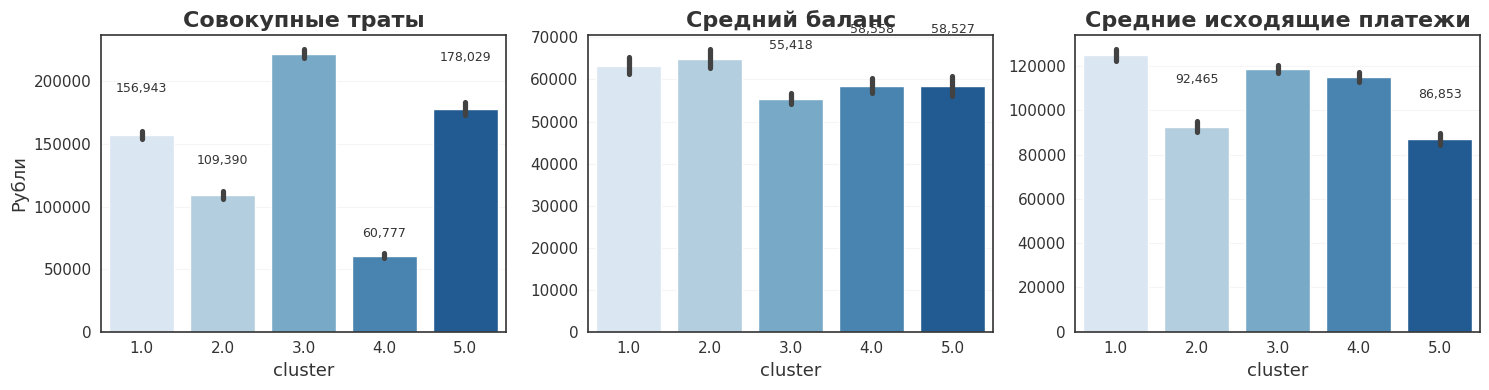

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
metrics = ['sovokupnye_traty', 'avg_integral_cur_rur_balance', 'avg_out_puc']
titles = ['Совокупные траты', 'Средний баланс', 'Средние исходящие платежи']

for i, metric in enumerate(metrics):
    sns.barplot(data=df, x='cluster', y=metric, ax=ax[i], palette='Blues')
    ax[i].set_title(titles[i])
    ax[i].set_ylabel('Рубли' if i==0 else '')

    for p in ax[i].patches:
        ax[i].annotate(f'{p.get_height():,.0f}',
                       (p.get_x() + p.get_width()/2., p.get_height()*1.2),
                       ha='center', va='center',
                       xytext=(0, 5), textcoords='offset points',
                       fontsize=9)
plt.tight_layout()
plt.show()

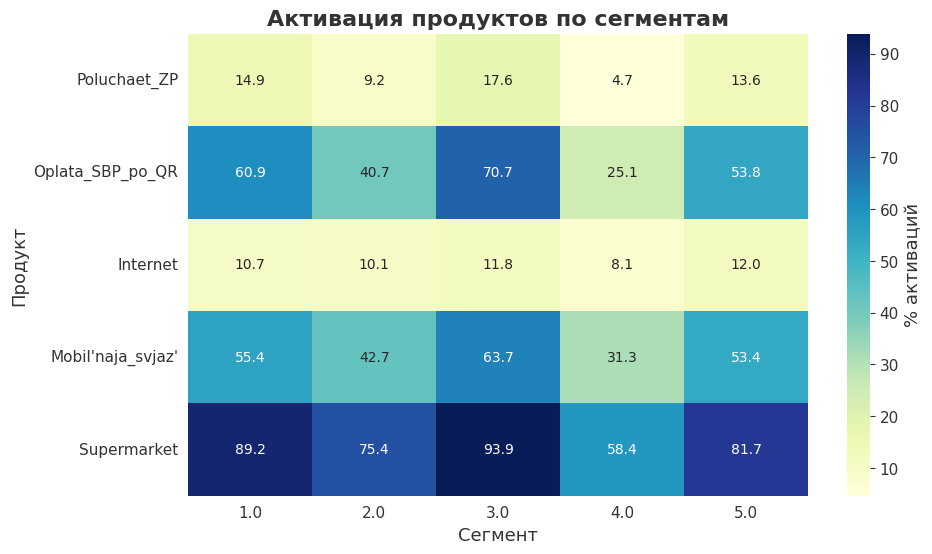

In [ ]:
products = ['Poluchaet_ZP', 'Oplata_SBP_po_QR', 'Internet', 'Mobil\'naja_svjaz\'', 'Supermarket']

plt.figure(figsize=(10, 6))
cluster_products = df.groupby('cluster')[products].mean().T * 100

sns.heatmap(cluster_products, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': '% активаций'})
plt.title('Активация продуктов по сегментам')
plt.ylabel('Продукт')
plt.xlabel('Сегмент')
plt.show()

<ipython-input-122-78485e27ecbb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='cluster', y='delay_m4_cnt', ax=ax[1], palette='OrRd')


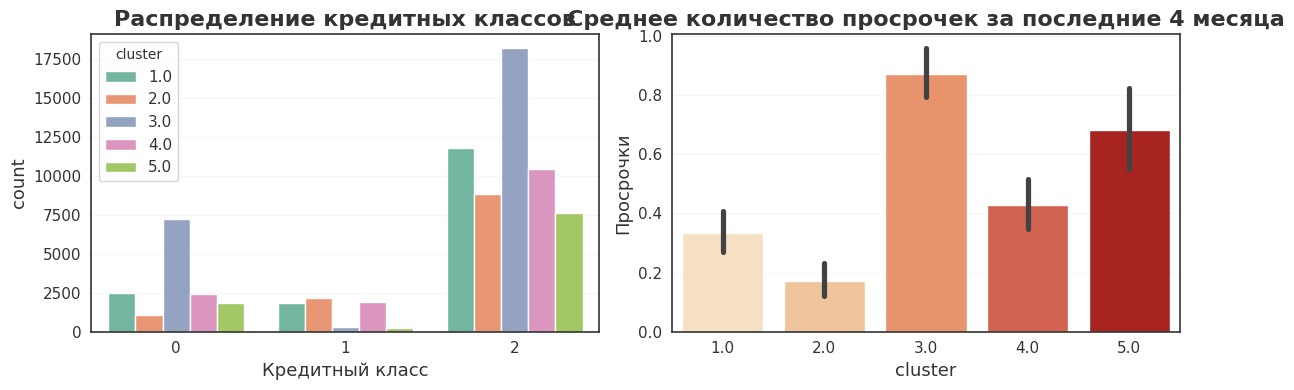

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(data=df, x='credit_class', hue='cluster', ax=ax[0], palette='Set2')
ax[0].set_title('Распределение кредитных классов')
ax[0].set_xlabel('Кредитный класс')

sns.barplot(data=df, x='cluster', y='delay_m4_cnt', ax=ax[1], palette='OrRd')
ax[1].set_title('Среднее количество просрочек за последние 4 месяца')
ax[1].set_ylabel('Просрочки')

for a in ax:
    for p in a.patches:
        h = p.get_height()

plt.tight_layout()
plt.show()

<ipython-input-109-86896c1a18d0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='cluster', y='party_rk_count', palette='Purples')


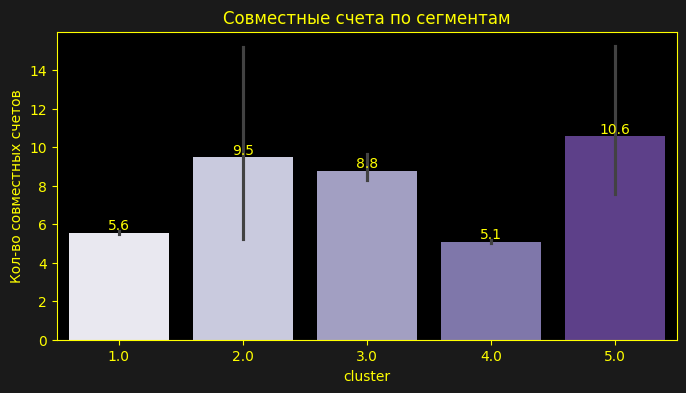

In [ ]:
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=df, x='cluster', y='party_rk_count', palette='Purples')
plt.title('Совместные счета по сегментам')
plt.ylabel('Кол-во совместных счетов')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
               (p.get_x()+p.get_width()/2, p.get_height()),
               ha='center', va='center',
               xytext=(0, 5), textcoords='offset points')
plt.show()

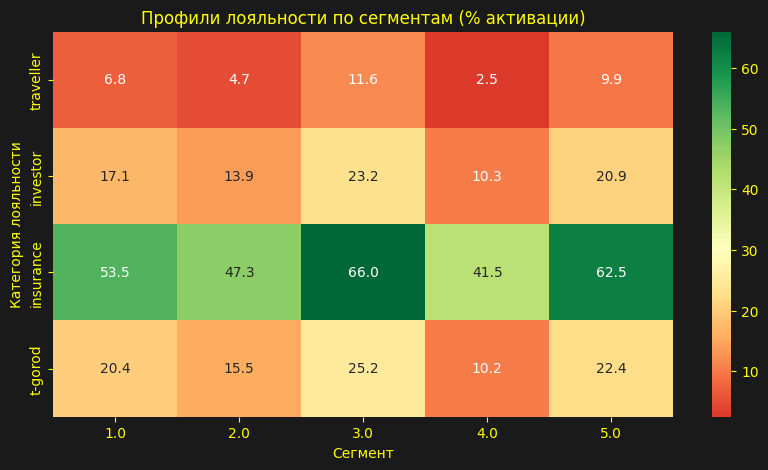

In [ ]:
loyalty = ['traveller', 'investor', 'insurance', 't-gorod']

plt.figure(figsize=(10, 5))
cluster_loyalty = df.groupby('cluster')[loyalty].mean().T * 100

sns.heatmap(cluster_loyalty, annot=True, fmt='.1f', cmap='RdYlGn', center=30)
plt.title('Профили лояльности по сегментам (% активации)')
plt.ylabel('Категория лояльности')
plt.xlabel('Сегмент')
plt.show()

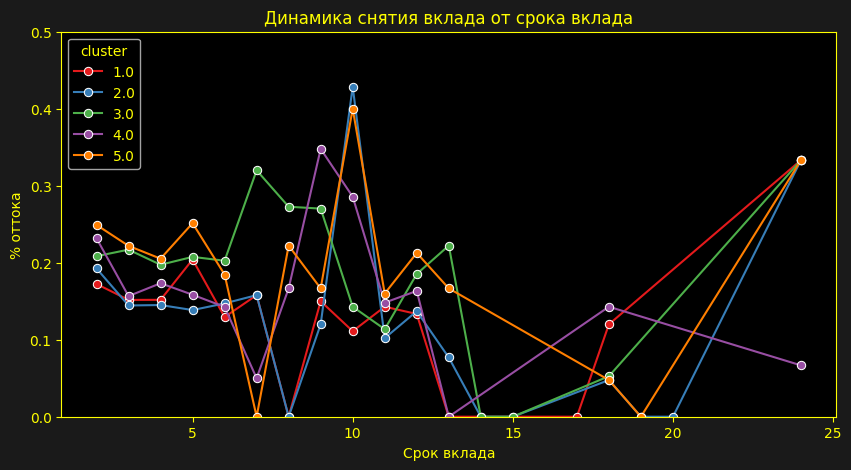

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=df.groupby(['months_cnt', 'cluster'])['target'].mean().reset_index(),
    x='months_cnt',
    y='target',
    hue='cluster',
    marker='o',
    palette='Set1'
)
plt.title('Динамика снятия вклада от срока вклада')
plt.ylabel('% оттока')
plt.xlabel('Срок вклада')
plt.ylim(0, 0.5)

plt.show()